In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/unridd-intrusion-detection-dataset/UNR-IDD.csv


# Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv("/kaggle/input/unridd-intrusion-detection-dataset/UNR-IDD.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Packets Rx Dropped             37411 non-null  int64 
 8   Packets Tx Dropped             37411 non-null  int64 
 9   Packets Rx Errors              37411 non-null  int64 
 10  Packets Tx Errors              37411 non-null  int64 
 11  Delta Received Packets         37411 non-null  int64 
 12  Delta Received Bytes           37411 non-null  int64 
 13  D

In [3]:
df.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,TCP-SYN,Attack


In [4]:
df.tail()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
37406,of:0000000000000006,Port#:2,228,30195,7857046,145141,276,0,0,0,...,0,0,True,0,6,147563,147454,-1,PortScan,Attack
37407,of:0000000000000006,Port#:3,1064,18962056,37732,338,276,0,0,0,...,0,0,True,0,6,147563,147454,-1,PortScan,Attack
37408,of:0000000000000009,Port#:1,1042,25252012,7856976,145140,276,0,0,0,...,0,0,True,0,8,295511,295404,-1,PortScan,Attack
37409,of:0000000000000009,Port#:2,149012,14360115,29509,211,276,0,0,0,...,0,0,True,0,8,295511,295404,-1,PortScan,Attack
37410,of:0000000000000009,Port#:3,228,30377,25258600,1138,276,0,0,0,...,0,0,True,0,8,295511,295404,-1,PortScan,Attack


In [5]:
df.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,Delta Received Packets,...,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size
count,37411.000000,3.741100e+04,3.741100e+04,37411.000000,37411.000000,37411.0,37411.0,37411.0,37411.0,37411.000000,...,3.741100e+04,3.741100e+04,3.741100e+04,3.741100e+04,3.741100e+04,37411.0,37411.000000,3.741100e+04,3.741100e+04,37411.0
mean,21618.897169,2.647491e+07,2.451212e+07,33626.824009,911.096415,0.0,0.0,0.0,0.0,194.958087,...,1.921455e+04,5.145597e+05,1.921455e+04,5.145597e+05,1.921455e+04,0.0,88.690572,1.008636e+05,1.007444e+05,-1.0
std,65283.170126,3.703044e+07,3.439876e+07,88792.970378,982.113446,0.0,0.0,0.0,0.0,1087.140797,...,1.107441e+05,1.863403e+06,1.107441e+05,1.863403e+06,1.107441e+05,0.0,790.715343,2.350297e+05,2.350284e+05,0.0
min,9.000000,7.860000e+02,5.705000e+03,41.000000,26.000000,0.0,0.0,0.0,0.0,0.000000,...,-1.284277e+06,0.000000e+00,-1.284277e+06,0.000000e+00,-1.284277e+06,0.0,4.000000,8.700000e+01,3.700000e+01,-1.0
25%,329.000000,9.104050e+04,5.775950e+04,347.000000,136.000000,0.0,0.0,0.0,0.0,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,5.000000,2.367000e+03,2.272000e+03,-1.0
50%,1170.000000,1.263052e+07,1.262658e+07,1240.000000,259.000000,0.0,0.0,0.0,0.0,4.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,6.000000,7.472000e+03,7.349000e+03,-1.0
75%,3417.000000,3.783230e+07,3.176443e+07,3968.000000,1747.000000,0.0,0.0,0.0,0.0,6.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,8.000000,2.343700e+04,2.322000e+04,-1.0
max,352772.000000,2.715925e+08,2.392430e+08,421598.000000,3317.000000,0.0,0.0,0.0,0.0,15695.000000,...,2.004388e+06,2.606759e+07,2.004388e+06,2.606759e+07,2.004388e+06,0.0,9987.000000,1.012574e+06,1.012439e+06,-1.0


In [6]:
df.apply(pd.Series.value_counts)


,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
-1284277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-645593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-644624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-642520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-639866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
of:0000000000000008,2208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
of:0000000000000009,1752.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
of:000000000000000a,5097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
of:000000000000000b,2476.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='Binary Label', ylabel='count'>

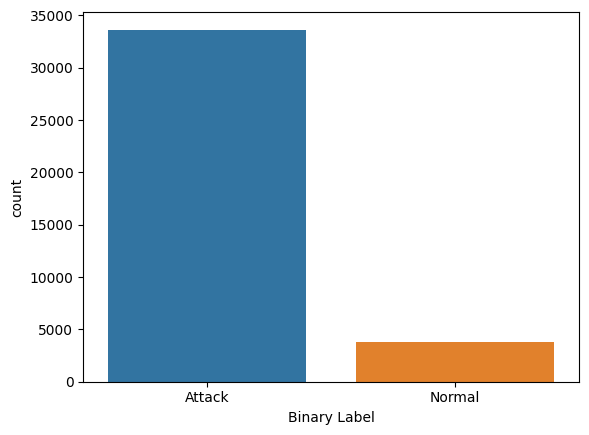

In [7]:
sns.countplot(data=df, x="Binary Label")

<AxesSubplot: xlabel='Label', ylabel='count'>

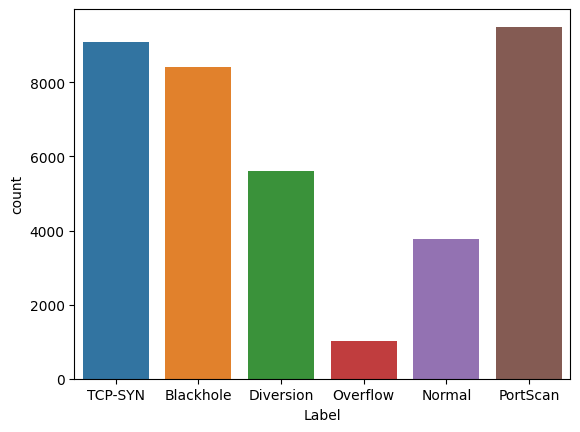

In [8]:
sns.countplot(x=df["Label"])

In [9]:
df["Binary Label"].unique()

array(['Attack', 'Normal'], dtype=object)

In [10]:
df["Label"].unique()

array(['TCP-SYN', 'Blackhole', 'Diversion', 'Overflow', 'Normal',
       'PortScan'], dtype=object)

In [11]:
df["Port Number"].unique()

array(['Port#:1', 'Port#:2', 'Port#:3', 'Port#:4'], dtype=object)

In [12]:
df["Switch ID"].unique()

array(['of:000000000000000c', 'of:000000000000000a',
       'of:000000000000000b', 'of:0000000000000003',
       'of:0000000000000004', 'of:0000000000000001',
       'of:0000000000000002', 'of:0000000000000007',
       'of:0000000000000008', 'of:0000000000000005',
       'of:0000000000000006', 'of:0000000000000009'], dtype=object)

In [13]:
df['Label'].value_counts()

PortScan     9500
TCP-SYN      9081
Blackhole    8420
Diversion    5615
Normal       3773
Overflow     1022
Name: Label, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Packets Rx Dropped             37411 non-null  int64 
 8   Packets Tx Dropped             37411 non-null  int64 
 9   Packets Rx Errors              37411 non-null  int64 
 10  Packets Tx Errors              37411 non-null  int64 
 11  Delta Received Packets         37411 non-null  int64 
 12  Delta Received Bytes           37411 non-null  int64 
 13  D

array([[<AxesSubplot: title={'center': 'Received Packets'}>,
        <AxesSubplot: title={'center': 'Received Bytes'}>,
        <AxesSubplot: title={'center': 'Sent Bytes'}>,
        <AxesSubplot: title={'center': 'Sent Packets'}>,
        <AxesSubplot: title={'center': 'Port alive Duration (S)'}>],
       [<AxesSubplot: title={'center': 'Packets Rx Dropped'}>,
        <AxesSubplot: title={'center': 'Packets Tx Dropped'}>,
        <AxesSubplot: title={'center': 'Packets Rx Errors'}>,
        <AxesSubplot: title={'center': 'Packets Tx Errors'}>,
        <AxesSubplot: title={'center': 'Delta Received Packets'}>],
       [<AxesSubplot: title={'center': 'Delta Received Bytes'}>,
        <AxesSubplot: title={'center': 'Delta Sent Bytes'}>,
        <AxesSubplot: title={'center': 'Delta Sent Packets'}>,
        <AxesSubplot: title={'center': 'Delta Port alive Duration (S)'}>,
        <AxesSubplot: title={'center': 'Delta Packets Rx Dropped'}>],
       [<AxesSubplot: title={'center': ' Delta P

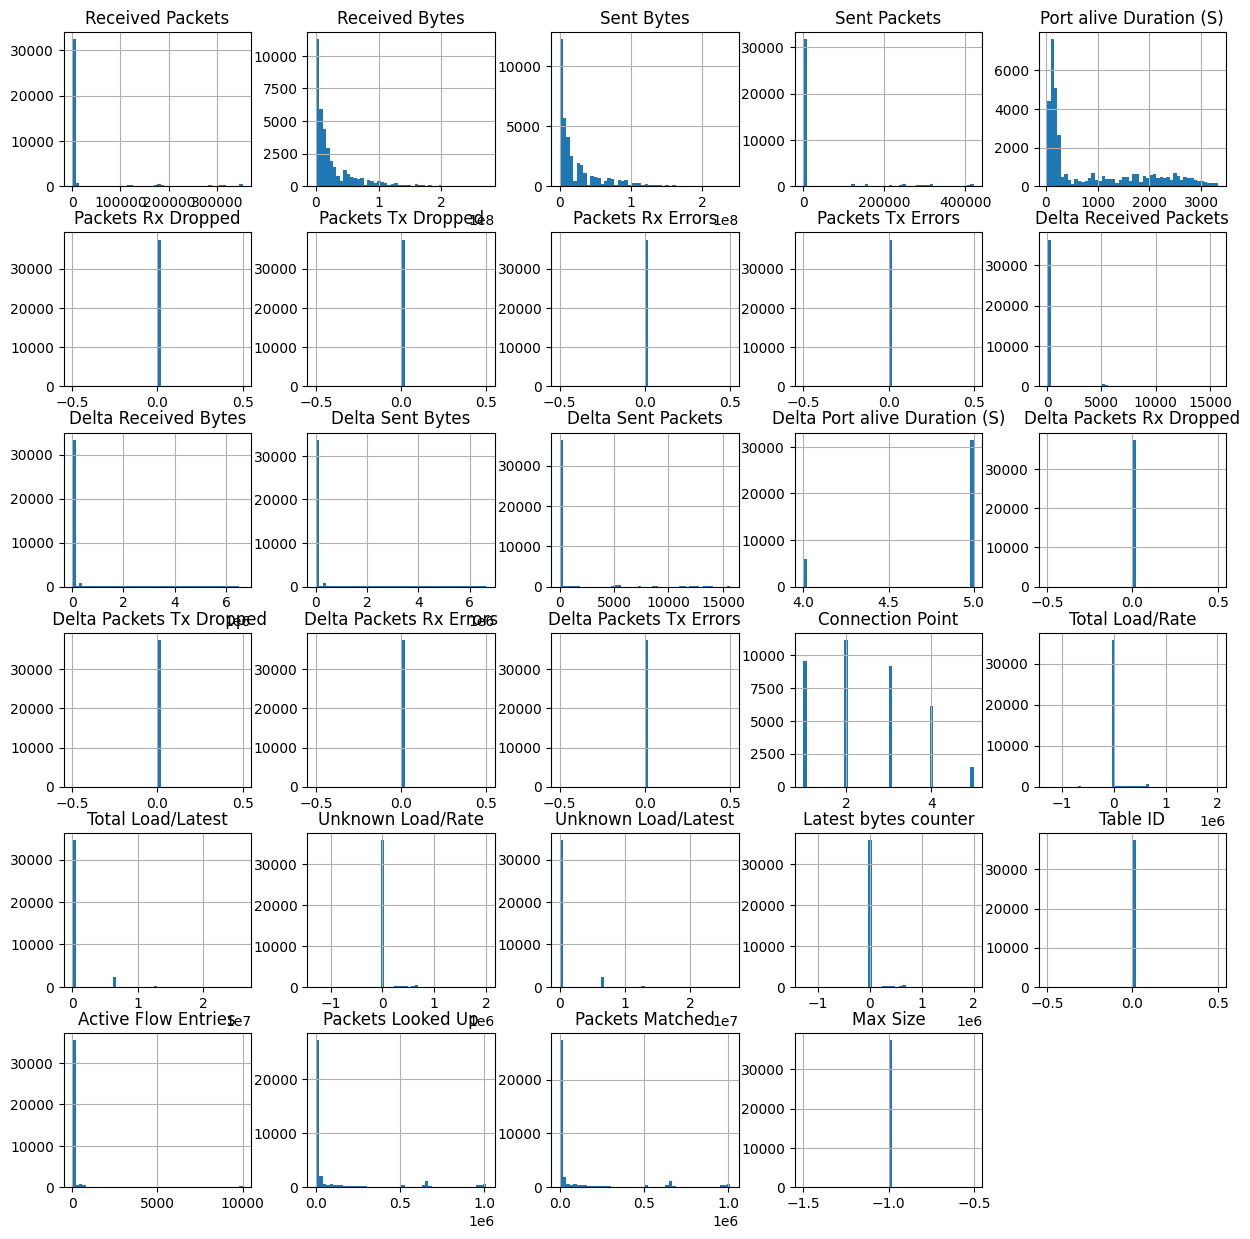

In [15]:
df.hist(bins = 50,figsize = (15,15))

# Data Pre-processing

In [16]:
#['Attack', 'Normal']=[1,0]
df_a=df[df['Binary Label']=='Attack']
df_n=df[df['Binary Label']=='Normal']


In [17]:
df_a

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,TCP-SYN,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37406,of:0000000000000006,Port#:2,228,30195,7857046,145141,276,0,0,0,...,0,0,True,0,6,147563,147454,-1,PortScan,Attack
37407,of:0000000000000006,Port#:3,1064,18962056,37732,338,276,0,0,0,...,0,0,True,0,6,147563,147454,-1,PortScan,Attack
37408,of:0000000000000009,Port#:1,1042,25252012,7856976,145140,276,0,0,0,...,0,0,True,0,8,295511,295404,-1,PortScan,Attack
37409,of:0000000000000009,Port#:2,149012,14360115,29509,211,276,0,0,0,...,0,0,True,0,8,295511,295404,-1,PortScan,Attack


In [18]:
print(df_n['Label'].nunique())
# no need to use df_n as it has nomal
df_n.info()

1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3773 entries, 24138 to 27910
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      3773 non-null   object
 1   Port Number                    3773 non-null   object
 2   Received Packets               3773 non-null   int64 
 3   Received Bytes                 3773 non-null   int64 
 4   Sent Bytes                     3773 non-null   int64 
 5   Sent Packets                   3773 non-null   int64 
 6   Port alive Duration (S)        3773 non-null   int64 
 7   Packets Rx Dropped             3773 non-null   int64 
 8   Packets Tx Dropped             3773 non-null   int64 
 9   Packets Rx Errors              3773 non-null   int64 
 10  Packets Tx Errors              3773 non-null   int64 
 11  Delta Received Packets         3773 non-null   int64 
 12  Delta Received Bytes           3773 non-null   int64 
 

In [19]:
df_a=df_a.drop('Binary Label', axis=1)

In [20]:
df_a["Port Number"]=df_a["Port Number"].replace(['Port#:1', 'Port#:2', 'Port#:3', 'Port#:4'],[1,2,3,4])
df_a["Switch ID"]=df_a["Switch ID"].replace(['of:000000000000000c', 'of:000000000000000a',
       'of:000000000000000b', 'of:0000000000000003',
       'of:0000000000000004', 'of:0000000000000001',
       'of:0000000000000002', 'of:0000000000000007',
       'of:0000000000000008', 'of:0000000000000005',
       'of:0000000000000006', 'of:0000000000000009'],[12,10,11,3,4,1,2,7,8,5,6,9])

df_a['Label']=df_a['Label'].replace(['TCP-SYN', 'Blackhole', 'Diversion', 'Overflow','PortScan'],
                   [0,1,2,3,4])

In [21]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33638 entries, 0 to 37410
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Switch ID                      33638 non-null  int64
 1   Port Number                    33638 non-null  int64
 2   Received Packets               33638 non-null  int64
 3   Received Bytes                 33638 non-null  int64
 4   Sent Bytes                     33638 non-null  int64
 5   Sent Packets                   33638 non-null  int64
 6   Port alive Duration (S)        33638 non-null  int64
 7   Packets Rx Dropped             33638 non-null  int64
 8   Packets Tx Dropped             33638 non-null  int64
 9   Packets Rx Errors              33638 non-null  int64
 10  Packets Tx Errors              33638 non-null  int64
 11  Delta Received Packets         33638 non-null  int64
 12  Delta Received Bytes           33638 non-null  int64
 13  Delta Sent Bytes

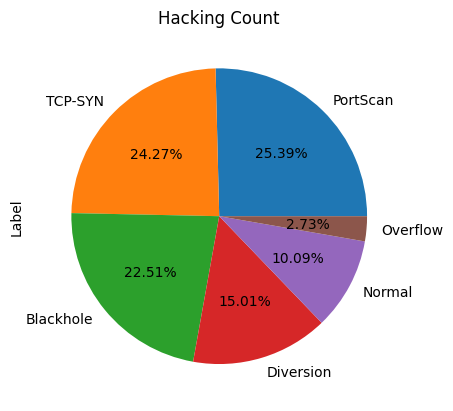

In [22]:

df['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Hacking Count")
plt.show()

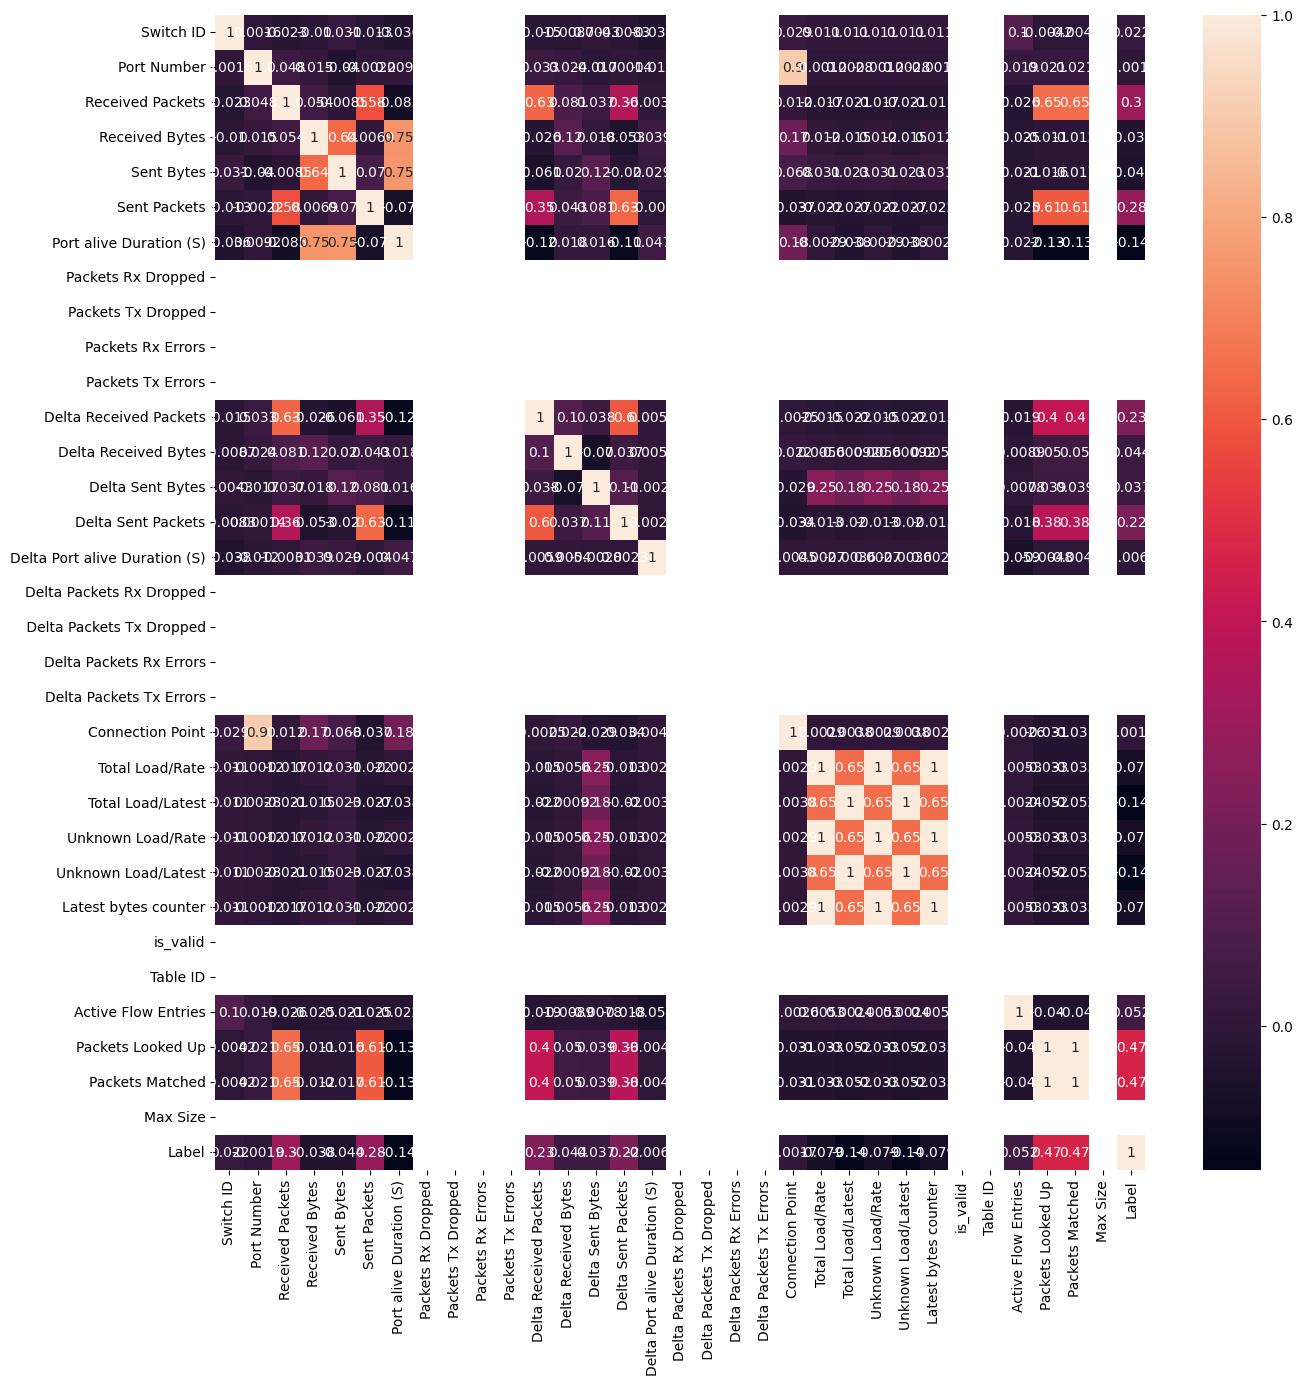

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(df_a.corr(), annot=True)
plt.show()

In [24]:
#pairplot for particular features

# plt_df = df_a[['Switch ID', 'Port Number', 'Received Packets', 'Received Bytes',
#        'Sent Bytes', 'Sent Packets', 'Port alive Duration (S)',
#        'Packets Rx Dropped', 'Packets Tx Dropped', 'Packets Rx Errors',
#        'Packets Tx Errors', 'Delta Received Packets', 'Delta Received Bytes',
#        'Delta Sent Bytes', 'Delta Sent Packets',
#        'Delta Port alive Duration (S)', 'Delta Packets Rx Dropped',
#        ' Delta Packets Tx Dropped', 'Delta Packets Rx Errors',
#        'Delta Packets Tx Errors', 'Connection Point', 'Total Load/Rate',
#        'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest',
#        'Latest bytes counter', 'is_valid', 'Table ID', 'Active Flow Entries',
#        'Packets Looked Up', 'Packets Matched', 'Max Size', 'Label']]
# fig =sns.pairplot(data = plt_df,hue="Label",corner=True);
# fig.savefig("out.png") 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib 
import warnings
warnings.filterwarnings('ignore')

In [26]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33638 entries, 0 to 37410
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Switch ID                      33638 non-null  int64
 1   Port Number                    33638 non-null  int64
 2   Received Packets               33638 non-null  int64
 3   Received Bytes                 33638 non-null  int64
 4   Sent Bytes                     33638 non-null  int64
 5   Sent Packets                   33638 non-null  int64
 6   Port alive Duration (S)        33638 non-null  int64
 7   Packets Rx Dropped             33638 non-null  int64
 8   Packets Tx Dropped             33638 non-null  int64
 9   Packets Rx Errors              33638 non-null  int64
 10  Packets Tx Errors              33638 non-null  int64
 11  Delta Received Packets         33638 non-null  int64
 12  Delta Received Bytes           33638 non-null  int64
 13  Delta Sent Bytes

In [27]:
# Splitting the dataset into dependant and independant fetature

X = df_a.drop(['Label','Packets Rx Dropped', 'Packets Tx Dropped', 'Packets Rx Errors',
       'Packets Tx Errors','Delta Packets Rx Dropped',
       ' Delta Packets Tx Dropped', 'Delta Packets Rx Errors',
       'Delta Packets Tx Errors', 'is_valid', 'Table ID','Max Size'],axis =1)
y = df_a["Label"]

In [28]:
y.unique()

array([0, 1, 2, 3, 4])

In [29]:
X.shape,y.shape

((33638, 21), (33638,))

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((26910, 21), (26910,), (6728, 21), (6728,))

## Model Building & Training:
   Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

   There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

1. Logistic Regression
2. k-Nearest Neighbors 
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Catboost
9. Xgboost
10. Multilayer Perceptrons

              
  The metrics considered to evaluate the model performance are Accuracy & F1 score.

In [31]:
# Creating holders to store the model performance results
from sklearn import metrics 
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    f1_score.append(round(b, 3))
    recall.append(round(c, 3))
    precision.append(round(d, 3))

In [32]:
def model_report(modelname,y_train,y_test,p_train,p_test):
    #computing the accuracy, f1_score, Recall, precision of the model performance
    #computing the classification report of the model
    #storing the results. The below mentioned order of parameter passing is important
    print("Model:{}\n".format(modelname))
    
    acc_train = metrics.accuracy_score(y_train,p_train)
    acc_test = metrics.accuracy_score(y_test,p_test)
    print("Accuracy on training Data: {:.3f}".format(acc_train))
    print("Accuracy on test Data: {:.3f}\n".format(acc_test))
    
    f1_score_train = metrics.f1_score(y_train,p_train,average='micro')
    f1_score_test = metrics.f1_score(y_test,p_test,average='micro')
    print("f1_score on training Data: {:.3f}".format(f1_score_train))
    print("f1_score on test Data: {:.3f}\n".format(f1_score_test))
    

    recall_score_train = metrics.recall_score(y_train,p_train,average='micro')
    recall_score_test = metrics.recall_score(y_test,p_test,average='micro')
    print("Recall on training Data: {:.3f}".format(recall_score_train))
    print("Recall on test Data: {:.3f}\n".format(recall_score_test))

    precision_score_train = metrics.precision_score(y_train,p_train,average='micro')
    precision_score_test = metrics.precision_score(y_test,p_test,average='micro')
    print("Precision on training Data: {:.3f}".format(precision_score_train))
    print("Precision on test Data: {:.3f}\n".format(precision_score_test))
    #computing the classification report of the model
    print("Classification Report")
    print(metrics.classification_report(y_test, p_test))
    
    #storing the results
    storeResults(modelname,acc_test,f1_score_test,
             recall_score_test,precision_score_test)

## Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [33]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [34]:
#predicting the target value from the model for the samples

p_train_log = log.predict(X_train)
p_test_log = log.predict(X_test)

In [35]:

model_report(str(log),y_train,y_test,p_train_log,p_test_log)

Model:LogisticRegression()

Accuracy on training Data: 0.411
Accuracy on test Data: 0.417

f1_score on training Data: 0.411
f1_score on test Data: 0.417

Recall on training Data: 0.411
Recall on test Data: 0.417

Precision on training Data: 0.411
Precision on test Data: 0.417

Classification Report
              precision    recall  f1-score   support

           0       0.52      0.21      0.29      1824
           1       0.31      0.21      0.25      1665
           2       0.29      0.75      0.42      1138
           3       0.00      0.00      0.00       177
           4       0.62      0.64      0.63      1924

    accuracy                           0.42      6728
   macro avg       0.35      0.36      0.32      6728
weighted avg       0.44      0.42      0.39      6728



## K-Nearest Neighbors : Classifier

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [36]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier()

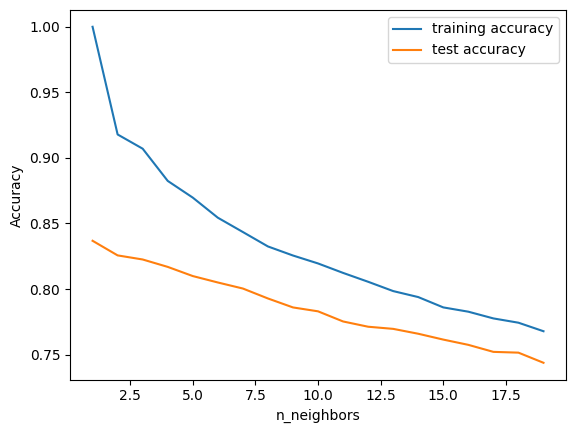

In [37]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn1 = KNeighborsClassifier(n_neighbors=n)

    knn1.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn1.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn1.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [38]:
#predicting the target value from the model for the samples
p_train_knn = knn.predict(X_train)
p_test_knn = knn.predict(X_test)

In [39]:
model_report(str(knn),y_train,y_test,p_train_knn,p_test_knn)

Model:KNeighborsClassifier()

Accuracy on training Data: 0.870
Accuracy on test Data: 0.810

f1_score on training Data: 0.870
f1_score on test Data: 0.810

Recall on training Data: 0.870
Recall on test Data: 0.810

Precision on training Data: 0.870
Precision on test Data: 0.810

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1824
           1       0.83      0.84      0.84      1665
           2       0.82      0.83      0.83      1138
           3       0.76      0.46      0.57       177
           4       0.81      0.78      0.80      1924

    accuracy                           0.81      6728
   macro avg       0.80      0.75      0.77      6728
weighted avg       0.81      0.81      0.81      6728



## Naive Bayes : Classifier

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [40]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [41]:
#predicting the target value from the model for the samples
p_train_nb = nb.predict(X_train)
p_test_nb = nb.predict(X_test)

In [42]:
model_report(str(nb),y_train,y_test,p_train_nb,p_test_nb)

Model:GaussianNB()

Accuracy on training Data: 0.595
Accuracy on test Data: 0.602

f1_score on training Data: 0.595
f1_score on test Data: 0.602

Recall on training Data: 0.595
Recall on test Data: 0.602

Precision on training Data: 0.595
Precision on test Data: 0.602

Classification Report
              precision    recall  f1-score   support

           0       0.53      0.93      0.67      1824
           1       0.57      0.45      0.50      1665
           2       0.56      0.49      0.52      1138
           3       0.29      0.30      0.30       177
           4       1.00      0.51      0.68      1924

    accuracy                           0.60      6728
   macro avg       0.59      0.54      0.53      6728
weighted avg       0.67      0.60      0.60      6728



##  Decision Trees : Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [43]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [44]:
#predicting the target value from the model for the samples

p_train_tree = tree.predict(X_train)
p_test_tree = tree.predict(X_test)

In [45]:
model_report(str(tree),y_train,y_test,p_train_nb,p_test_tree)

Model:DecisionTreeClassifier(max_depth=30)

Accuracy on training Data: 0.595
Accuracy on test Data: 0.924

f1_score on training Data: 0.595
f1_score on test Data: 0.924

Recall on training Data: 0.595
Recall on test Data: 0.924

Precision on training Data: 0.595
Precision on test Data: 0.924

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1824
           1       0.98      0.98      0.98      1665
           2       0.98      0.98      0.98      1138
           3       0.76      0.84      0.80       177
           4       0.89      0.90      0.90      1924

    accuracy                           0.92      6728
   macro avg       0.90      0.91      0.91      6728
weighted avg       0.92      0.92      0.92      6728



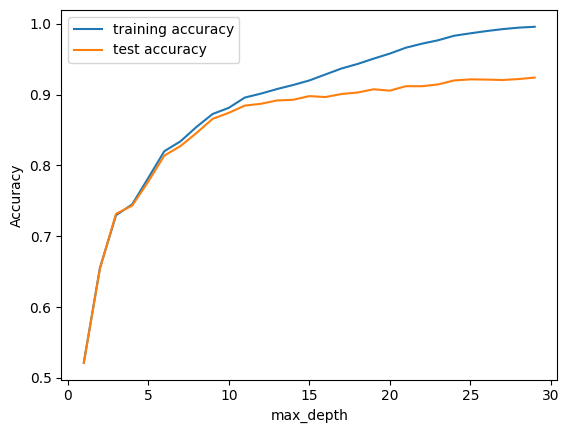

In [46]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

##  Random Forest : Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [47]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [48]:
#predicting the target value from the model for the samples
p_train_forest = forest.predict(X_train)
p_test_forest = forest.predict(X_test)

In [49]:
model_report(str(forest),y_train,y_test,p_train_nb,p_test_forest)

Model:RandomForestClassifier(n_estimators=10)

Accuracy on training Data: 0.595
Accuracy on test Data: 0.934

f1_score on training Data: 0.595
f1_score on test Data: 0.934

Recall on training Data: 0.595
Recall on test Data: 0.934

Precision on training Data: 0.595
Precision on test Data: 0.934

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1824
           1       0.99      0.98      0.98      1665
           2       1.00      0.97      0.98      1138
           3       0.99      0.77      0.86       177
           4       0.92      0.89      0.91      1924

    accuracy                           0.93      6728
   macro avg       0.95      0.91      0.93      6728
weighted avg       0.94      0.93      0.93      6728



## Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective. 

In [50]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [51]:
#predicting the target value from the model for the samples
p_train_gbc = gbc.predict(X_train)
p_test_gbc = gbc.predict(X_test)

In [52]:
model_report(str(gbc),y_train,y_test,p_train_nb,p_test_gbc)

Model:GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

Accuracy on training Data: 0.595
Accuracy on test Data: 0.962

f1_score on training Data: 0.595
f1_score on test Data: 0.962

Recall on training Data: 0.595
Recall on test Data: 0.962

Precision on training Data: 0.595
Precision on test Data: 0.962

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1824
           1       1.00      0.99      0.99      1665
           2       1.00      1.00      1.00      1138
           3       0.99      0.89      0.94       177
           4       0.94      0.94      0.94      1924

    accuracy                           0.96      6728
   macro avg       0.97      0.95      0.96      6728
weighted avg       0.96      0.96      0.96      6728



## CatBoost Classifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.

In [53]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 1.4047392	total: 90.8ms	remaining: 1m 30s
1:	learn: 1.2683037	total: 115ms	remaining: 57.4s
2:	learn: 1.1587877	total: 139ms	remaining: 46.2s
3:	learn: 1.0618002	total: 167ms	remaining: 41.6s
4:	learn: 0.9877186	total: 201ms	remaining: 39.9s
5:	learn: 0.9276801	total: 226ms	remaining: 37.4s
6:	learn: 0.8774632	total: 253ms	remaining: 35.8s
7:	learn: 0.8322943	total: 279ms	remaining: 34.6s
8:	learn: 0.7944906	total: 306ms	remaining: 33.7s
9:	learn: 0.7598818	total: 333ms	remaining: 33s
10:	learn: 0.7252189	total: 360ms	remaining: 32.4s
11:	learn: 0.6985259	total: 386ms	remaining: 31.8s
12:	learn: 0.6705513	total: 413ms	remaining: 31.4s
13:	learn: 0.6512249	total: 439ms	remaining: 30.9s
14:	learn: 0.6307691	total: 466ms	remaining: 30.6s
15:	learn: 0.6111380	total: 491ms	remaining: 30.2s
16:	learn: 0.5963399	total: 516ms	remaining: 29.9s
17:	learn: 0.5797644	total: 541ms	remaining: 29.5s
18:	learn: 0.5651210	total: 566ms	remaining: 29.2s
19:	learn: 0.5543463	total: 588ms	remaini

In [54]:
#predicting the target value from the model for the samples
p_train_cat = cat.predict(X_train)
p_test_cat = cat.predict(X_test)

In [55]:
model_report(str(cat),y_train,y_test,p_train_cat,p_test_cat)

Model:<catboost.core.CatBoostClassifier object at 0x7fc83c2a85b0>

Accuracy on training Data: 0.986
Accuracy on test Data: 0.952

f1_score on training Data: 0.986
f1_score on test Data: 0.952

Recall on training Data: 0.986
Recall on test Data: 0.952

Precision on training Data: 0.986
Precision on test Data: 0.952

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1824
           1       0.99      0.99      0.99      1665
           2       1.00      1.00      1.00      1138
           3       0.97      0.85      0.91       177
           4       0.93      0.93      0.93      1924

    accuracy                           0.95      6728
   macro avg       0.96      0.94      0.95      6728
weighted avg       0.95      0.95      0.95      6728



##  XGBoost Classifier

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning. In this post you will discover how you can install and create your first XGBoost model in Python

In [56]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [57]:
#predicting the target value from the model for the samples
p_train_xgb = xgb.predict(X_train)
p_test_xgb = xgb.predict(X_test)

In [58]:
model_report(str(xgb),y_train,y_test,p_train_xgb,p_test_xgb)

Model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Accuracy on training Data: 0.994
Accuracy on test Data: 0.965

f1_score on training Data: 0.994
f1_score on test Data: 0.965

Recall on training Data: 0.994
Recall on test Data: 0.965

Precision on training Data: 0.994
Precision on 

##  Multi-layer Perceptron classifier

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


In [59]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [60]:
#predicting the target value from the model for the samples
p_train_mlp = mlp.predict(X_train)
p_test_mlp = mlp.predict(X_test)

In [61]:
model_report(str(mlp),y_train,y_test,p_train_mlp,p_test_mlp)

Model:MLPClassifier()

Accuracy on training Data: 0.508
Accuracy on test Data: 0.513

f1_score on training Data: 0.508
f1_score on test Data: 0.513

Recall on training Data: 0.508
Recall on test Data: 0.513

Precision on training Data: 0.508
Precision on test Data: 0.513

Classification Report
              precision    recall  f1-score   support

           0       0.44      0.83      0.58      1824
           1       0.35      0.05      0.09      1665
           2       0.41      0.70      0.52      1138
           3       0.66      0.22      0.33       177
           4       0.94      0.53      0.68      1924

    accuracy                           0.51      6728
   macro avg       0.56      0.47      0.44      6728
weighted avg       0.56      0.51      0.47      6728



##  Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [62]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [63]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,"XGBClassifier(base_score=None, booster=None, c...",0.965,0.965,0.965,0.965
1,"GradientBoostingClassifier(learning_rate=0.7, ...",0.962,0.962,0.962,0.962
2,<catboost.core.CatBoostClassifier object at 0x...,0.952,0.952,0.952,0.952
3,RandomForestClassifier(n_estimators=10),0.934,0.934,0.934,0.934
4,DecisionTreeClassifier(max_depth=30),0.924,0.924,0.924,0.924
5,KNeighborsClassifier(),0.810,0.810,0.810,0.810
6,GaussianNB(),0.602,0.602,0.602,0.602
7,MLPClassifier(),0.513,0.513,0.513,0.513
8,LogisticRegression(),0.417,0.417,0.417,0.417


## Storing High Score Model 

In [64]:
##  high_score_model ---> XGBoost Classifier Model
import pickle

high_score_model = XGBClassifier()

high_score_model.fit(X_train,y_train)

# dump information to that file
#pickle.dump(high_score_model, open('pickle/model.pkl', 'wb'))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [65]:
pickle.dump(high_score_model, open('model.pkl', 'wb'))

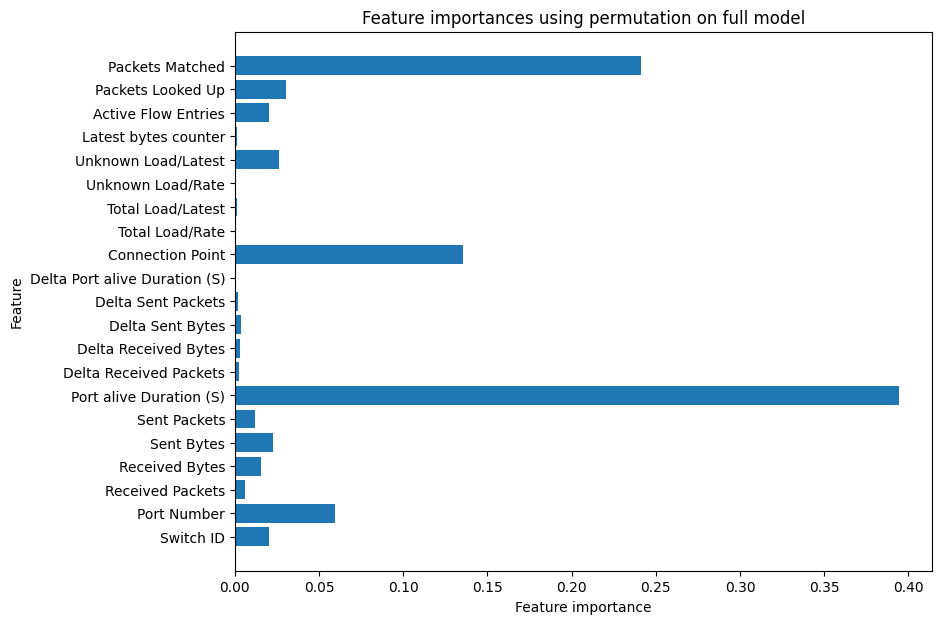

In [66]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()